# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 628


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city

    city_url = url + "&q=" + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["cod"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | bonavista
Processing Record 6 of Set 1 | ketchikan
Processing Record 7 of Set 1 | luganville
Processing Record 8 of Set 1 | alofi
Processing Record 9 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 10 of Set 1 | antofagasta
Processing Record 11 of Set 1 | codrington
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | matay
Processing Record 15 of Set 1 | margate
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | mar del plata
Processing Record 18 of Set 1 | kavieng
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | beringovskiy
Processing Record 21 of

In [8]:
city_weather

{'coord': {'lon': -8.3327, 'lat': 40.1629},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 53.76,
  'feels_like': 53.44,
  'temp_min': 53.76,
  'temp_max': 53.76,
  'pressure': 1020,
  'humidity': 98,
  'sea_level': 1020,
  'grnd_level': 999},
 'visibility': 10000,
 'wind': {'speed': 1.77, 'deg': 5, 'gust': 2.77},
 'clouds': {'all': 82},
 'dt': 1682287890,
 'sys': {'country': 'PT', 'sunrise': 1682228645, 'sunset': 1682277539},
 'timezone': 3600,
 'id': 2738381,
 'name': 'Lata',
 'cod': 200}

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,avarua,-21.2078,-159.7750,80.65,61,33,"{'speed': 11.5, 'deg': 90}",CK,200
1,yellowknife,62.4560,-114.3525,43.83,70,14,"{'speed': 3.69, 'deg': 122, 'gust': 4.81}",CA,200
2,atuona,-9.8000,-139.0333,81.45,77,18,"{'speed': 14.58, 'deg': 93, 'gust': 14.41}",PF,200
3,bonavista,48.6499,-53.1147,33.46,97,100,"{'speed': 19.62, 'deg': 0, 'gust': 31.45}",CA,200
4,ketchikan,55.3422,-131.6461,46.87,87,100,"{'speed': 12.66, 'deg': 120}",US,200


In [23]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [24]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,avarua,-21.2078,-159.7750,80.65,61,33,"{'speed': 11.5, 'deg': 90}",CK,200
1,yellowknife,62.4560,-114.3525,43.83,70,14,"{'speed': 3.69, 'deg': 122, 'gust': 4.81}",CA,200
2,atuona,-9.8000,-139.0333,81.45,77,18,"{'speed': 14.58, 'deg': 93, 'gust': 14.41}",PF,200
3,bonavista,48.6499,-53.1147,33.46,97,100,"{'speed': 19.62, 'deg': 0, 'gust': 31.45}",CA,200
4,ketchikan,55.3422,-131.6461,46.87,87,100,"{'speed': 12.66, 'deg': 120}",US,200


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

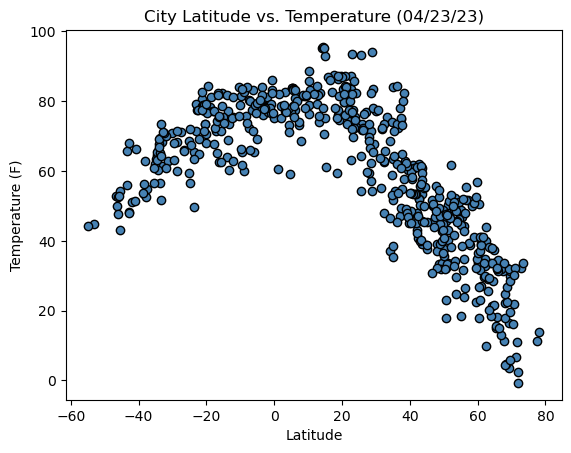

In [45]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values,y_values,edgecolors="black", facecolors="steelblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

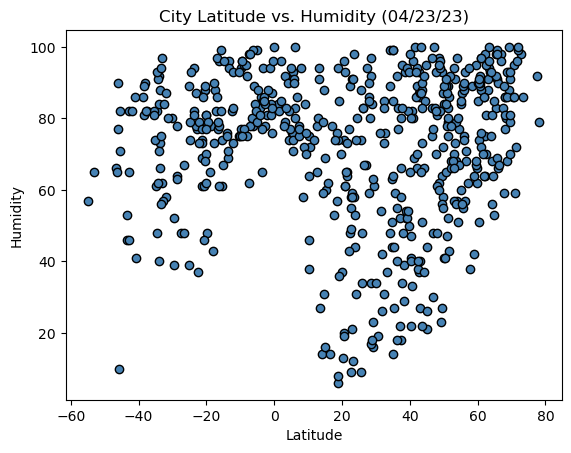

In [44]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values,edgecolors="black", facecolors="steelblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

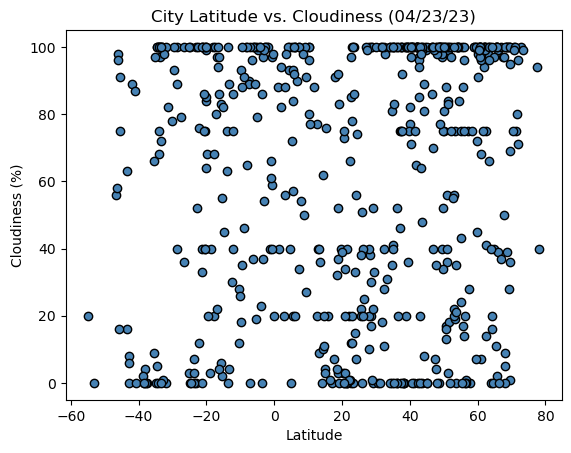

In [43]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values,edgecolors="black", facecolors="steelblue")
# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

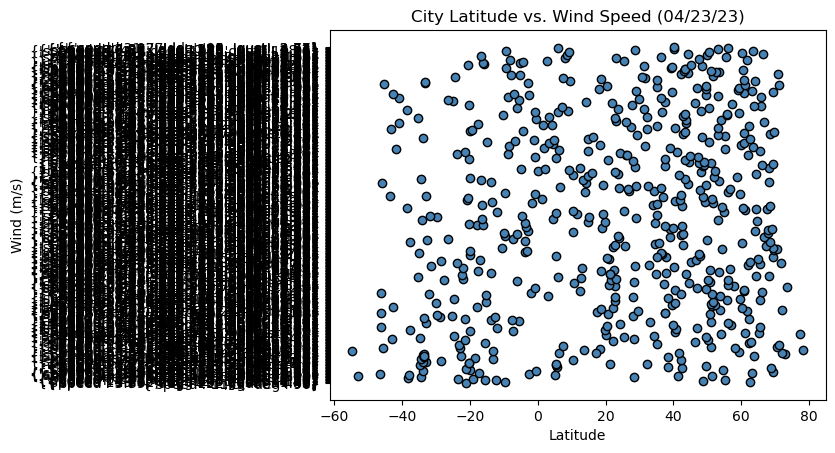

In [47]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values,edgecolors="black", facecolors="steelblue")
# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind (m/s)")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
#x_values = 
#y_values = 
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#fig, ax = plt.subplots()
#r_squared = rvalue ** 2
#ax.text(.1, 0.95, f"R-squared = {r_squared:.3f}", transform=ax.transAxes)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_values,y_values,edgecolors="black", facecolors="steelblue")
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
#plt.title("")
#plt.xlabel("")
#plt.ylabel("")
#plt.savefig("")

In [49]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,yellowknife,62.4560,-114.3525,43.83,70,14,"{'speed': 3.69, 'deg': 122, 'gust': 4.81}",CA,200
3,bonavista,48.6499,-53.1147,33.46,97,100,"{'speed': 19.62, 'deg': 0, 'gust': 31.45}",CA,200
4,ketchikan,55.3422,-131.6461,46.87,87,100,"{'speed': 12.66, 'deg': 120}",US,200
10,matay,28.4190,30.7792,71.58,34,17,"{'speed': 15.93, 'deg': 5, 'gust': 26.73}",EG,200
11,margate,51.3813,1.3862,47.89,89,99,"{'speed': 7, 'deg': 354, 'gust': 10}",GB,200


In [50]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,avarua,-21.2078,-159.7750,80.65,61,33,"{'speed': 11.5, 'deg': 90}",CK,200
2,atuona,-9.8000,-139.0333,81.45,77,18,"{'speed': 14.58, 'deg': 93, 'gust': 14.41}",PF,200
5,luganville,-15.5333,167.1667,82.38,74,55,"{'speed': 5.21, 'deg': 145, 'gust': 6.38}",VU,200
6,alofi,-19.0595,-169.9187,78.31,65,3,"{'speed': 14.38, 'deg': 94, 'gust': 14.25}",NU,200
7,antofagasta,-23.6500,-70.4000,65.48,82,7,"{'speed': 5.01, 'deg': 211, 'gust': 5.99}",CL,200


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


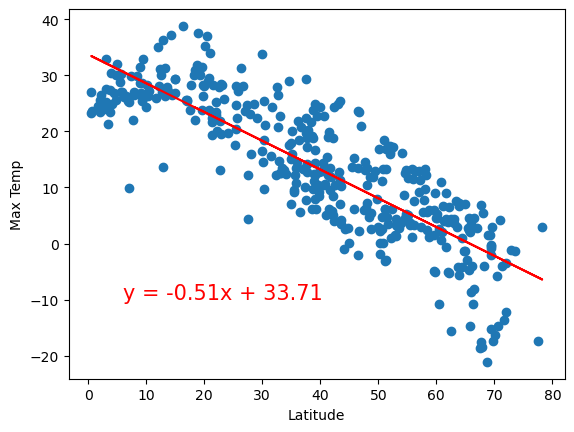

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


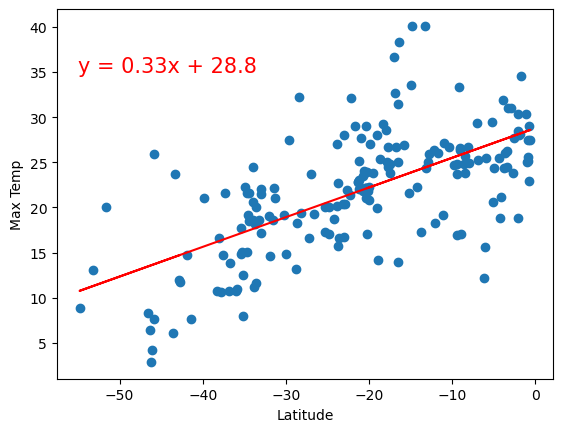

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


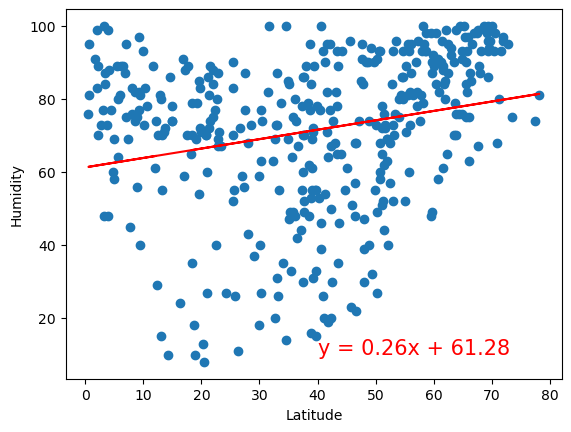

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


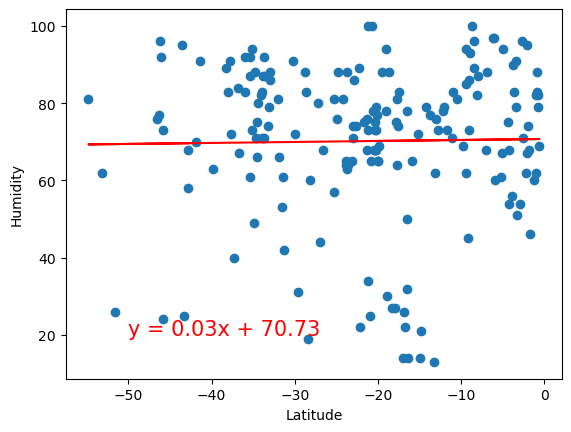

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


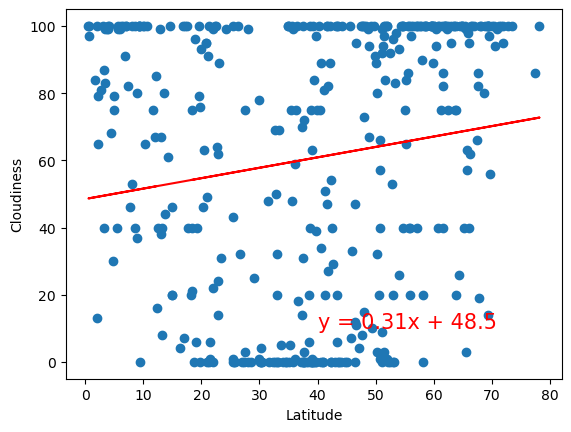

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


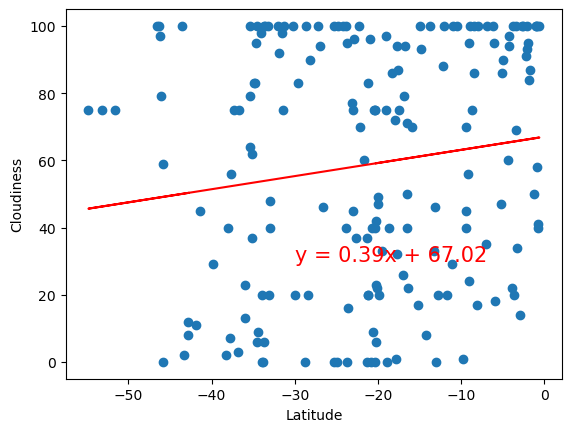

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


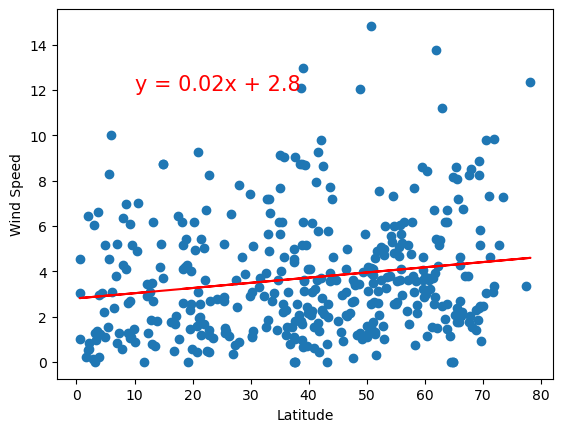

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


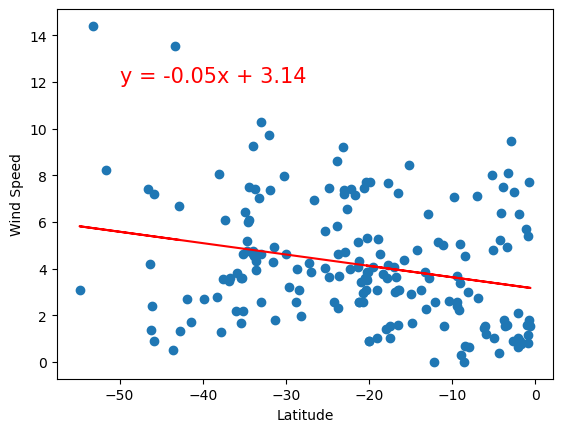

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE